## Datasets Preprocessing Description
### Data Sources and Selection:
#### The datasets selected in this study were sourced from the "The TON_IoT Datasets" available at https://research.unsw.edu.au/projects/toniot-datasets. Specifically, the 'IoT_Weather' dataset from the 'Processed_IoT_dataset' category and the complete 'Processed_Network_dataset' were utilized. The 'IoT_Weather' dataset contains sensor data, whereas the 'Processed_Network_dataset' contains network traffic data.

### Data Integration:
#### A comprehensive dataset was constructed by integrating the 'IoT_Weather' and 'Processed_Network_dataset'. The integration was performed based on two primary attributes: datetime and types of attacks. This merge was performed to correlate sensor data from the IoT devices with the corresponding network traffic, providing a holistic view of the IoT environment.

In [8]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
import warnings
warnings.simplefilter('ignore')

In [9]:
# Read IoT Weather dataset
df_weather = pd.read_csv('./IoT_Weather.csv')
df_weather.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [10]:
df_weather['date'] = pd.to_datetime(df_weather['date'] + ' ' + df_weather['time'])
df_weather.drop('time', axis=1, inplace=True)
df_weather.head()

,date,temperature,pressure,humidity,label,type
0,2019-03-31 12:36:52,31.788508,1.035,32.036579,0,normal
1,2019-03-31 12:36:53,41.630997,1.035,30.886165,0,normal
2,2019-03-31 12:36:54,42.256959,1.035,19.755908,0,normal
3,2019-03-31 12:36:55,49.116581,1.035,78.949621,0,normal
4,2019-03-31 12:36:56,24.017085,1.035,40.001059,0,normal


In [11]:
df_weather['type'].value_counts()

type
normal        559718
backdoor       35641
password       25715
ddos           15182
injection       9726
ransomware      2865
xss              866
scanning         529
Name: count, dtype: int64

In [12]:
df_weather.dtypes

date           datetime64[ns]
temperature           float64
pressure              float64
humidity              float64
label                   int64
type                   object
dtype: object

In [13]:
# Read selected columns from Processed Network dataset
selected_columns = ['ts', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 
                    'proto', 'service', 'duration', 'src_bytes', 'dst_bytes', 'conn_state', 
                    'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes', 'label', 'type']

read_all = []
for i in range(1, 24):
    file_path = os.path.join('E:\MCS\Master Project\Dataset\Processed_Network_dataset', f'Network_dataset_{i}.csv')
    df = pd.read_csv(file_path, usecols=selected_columns)
    read_all.append(df)

df_networks = pd.concat(read_all, ignore_index=True)
df_networks.head()

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type
0,1554198358,3.122.49.24,1883.0,192.168.1.152,52976.0,tcp,-,80549.530260,1762852.0,41933215.0,OTH,252181.0,14911156.0,2.0,236.0,0.0,normal
1,1554198358,192.168.1.79,47260.0,192.168.1.255,15600.0,udp,-,0.000000,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0,normal
2,1554198359,192.168.1.152,1880.0,192.168.1.152,51782.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal
3,1554198359,192.168.1.152,34296.0,192.168.1.152,10502.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal
4,1554198362,192.168.1.152,46608.0,192.168.1.190,53.0,udp,dns,0.000549,0.0,298.0,SHR,0.0,0.0,2.0,354.0,0.0,normal


In [14]:
# Convert timestamp to datetime
df_networks['datetime'] = pd.to_datetime(df_networks['ts'], unit='s', utc=True)
df_networks['datetime'] = df_networks['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_networks['datetime'] = pd.to_datetime(df_networks['datetime'])
df_networks.drop('ts', axis=1, inplace=True)
df_networks.head()

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label,type,datetime
0,3.122.49.24,1883.0,192.168.1.152,52976.0,tcp,-,80549.530260,1762852.0,41933215.0,OTH,252181.0,14911156.0,2.0,236.0,0.0,normal,2019-04-02 09:45:58
1,192.168.1.79,47260.0,192.168.1.255,15600.0,udp,-,0.000000,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0,normal,2019-04-02 09:45:58
2,192.168.1.152,1880.0,192.168.1.152,51782.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal,2019-04-02 09:45:59
3,192.168.1.152,34296.0,192.168.1.152,10502.0,tcp,-,0.000000,0.0,0.0,OTH,0.0,0.0,0.0,0.0,0.0,normal,2019-04-02 09:45:59
4,192.168.1.152,46608.0,192.168.1.190,53.0,udp,dns,0.000549,0.0,298.0,SHR,0.0,0.0,2.0,354.0,0.0,normal,2019-04-02 09:46:02


In [15]:
df_networks['type'].value_counts()

type
scanning      7140161
ddos          6165008
dos           3375328
xss           2108944
password      1365958
normal         788599
backdoor       508116
injection      452659
ransomware      72805
mitm             1052
Name: count, dtype: int64

In [16]:
df_networks.dtypes

src_ip                  object
src_port               float64
dst_ip                  object
dst_port               float64
proto                   object
service                 object
duration               float64
src_bytes              float64
dst_bytes              float64
conn_state              object
src_pkts               float64
src_ip_bytes           float64
dst_pkts               float64
dst_ip_bytes           float64
label                  float64
type                    object
datetime        datetime64[ns]
dtype: object

In [17]:
# Merge the IoT Weather dataset and the Processed Network dataset by datetime and network attack type
merged_df = pd.merge(df_weather, df_networks, left_on=['date', 'type'], right_on=['datetime', 'type'], how='outer')
merged_df.head()

,date,temperature,pressure,humidity,label_x,type,src_ip,src_port,dst_ip,dst_port,...,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label_y,datetime
0,2019-03-31 12:36:52,31.788508,1.035,32.036579,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2019-03-31 12:36:52,31.788508,1.035,32.036579,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2019-03-31 12:36:53,41.630997,1.035,30.886165,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2019-03-31 12:36:53,41.630997,1.035,30.886165,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2019-03-31 12:36:54,42.256959,1.035,19.755908,0.0,normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [18]:
# Delete useless columns and delete invalid rows
merged_df.drop(['label_x', 'datetime'], axis=1, inplace=True)
merged_df.dropna(inplace=True)
merged_df.head()

,date,temperature,pressure,humidity,type,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,label_y
303022,2019-04-02 09:46:16,42.284067,0.652519,46.438572,normal,192.168.1.79,41303.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303028,2019-04-02 09:46:46,42.072715,0.223474,46.438572,normal,192.168.1.79,35073.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303040,2019-04-02 09:47:46,41.082517,0.329780,39.293462,normal,192.168.1.79,47335.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303046,2019-04-02 09:48:16,40.790088,0.329780,39.293462,normal,192.168.1.79,32941.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303051,2019-04-02 09:48:41,41.704988,0.329780,39.293462,normal,192.168.1.133,5353.0,224.0.0.251,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0


In [19]:
merged_df['type'].value_counts()

type
ddos          1533818
password       726471
normal         302340
injection      283891
backdoor       176545
xss             53819
ransomware      35949
Name: count, dtype: int64

<Axes: xlabel='type'>

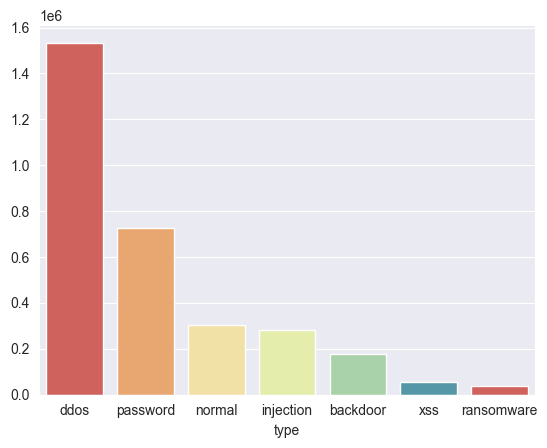

In [20]:
palette = sb.color_palette('Spectral')
sb.barplot(y=merged_df['type'].value_counts().values, x=merged_df['type'].value_counts().index, palette=palette)

<Axes: title={'center': 'Attack Type Distribution'}>

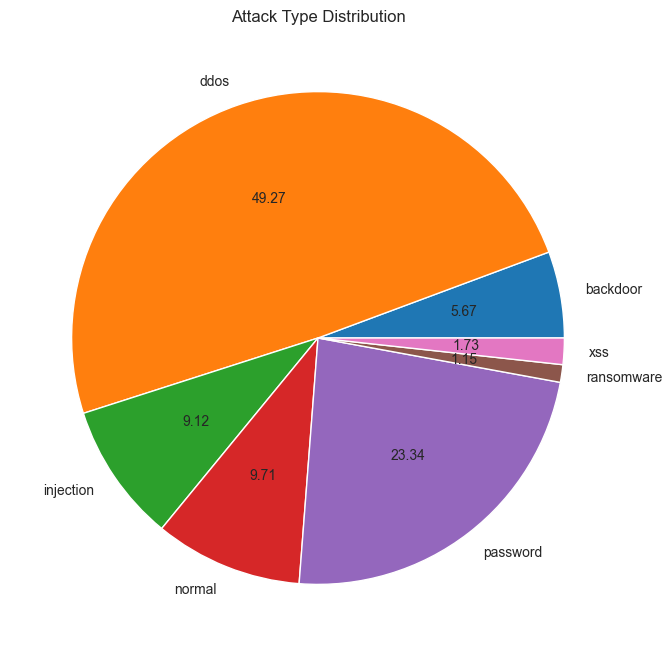

In [22]:
# Show the targets distribution
plt.title("Attack Type Distribution")
merged_df.groupby('type').size().plot(kind='pie', autopct='%.2f', figsize=(8,8))

In [23]:
print(f"Datasets Length: \nWeather: {len(df_weather)}\nNetworks: {len(df_networks)}\nMerged: {len(merged_df)}")

Datasets Length: 
Weather: 650242
Networks: 21978631
Merged: 3112833


In [24]:
# Drop datetime
merged_df.drop(['date', 'type'], axis=1, inplace=True)
merged_df.rename(columns={'label_y': 'target'}, inplace=True)
merged_df.head()

,temperature,pressure,humidity,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
303022,42.284067,0.652519,46.438572,192.168.1.79,41303.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303028,42.072715,0.223474,46.438572,192.168.1.79,35073.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303040,41.082517,0.329780,39.293462,192.168.1.79,47335.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303046,40.790088,0.329780,39.293462,192.168.1.79,32941.0,192.168.1.255,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303051,41.704988,0.329780,39.293462,192.168.1.133,5353.0,224.0.0.251,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0


In [25]:
# The IP address contains IPv4 and IPv6 and cannot be simply converted into numbers, so it is deleted.
merged_df.drop(['src_ip', 'dst_ip'], axis=1, inplace=True)
merged_df.head()

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
303022,42.284067,0.652519,46.438572,41303.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303028,42.072715,0.223474,46.438572,35073.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303040,41.082517,0.329780,39.293462,47335.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303046,40.790088,0.329780,39.293462,32941.0,15600.0,udp,-,0.0,0.0,0.0,S0,1.0,63.0,0.0,0.0,0.0
303051,41.704988,0.329780,39.293462,5353.0,5353.0,udp,dns,0.0,0.0,0.0,S0,1.0,77.0,0.0,0.0,0.0


In [26]:
# Encode target labels with integer value
le = LabelEncoder()
string_columns = ['proto', 'service', 'conn_state']
for col in string_columns:
    merged_df[col] = le.fit_transform(merged_df[col])

# Normalize the numeric columns
scaler = StandardScaler()
numeric_columns = ['temperature', 'pressure', 'humidity', 'src_port', 'dst_port', 
                     'duration', 'src_bytes', 'dst_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes']
merged_df[numeric_columns] = scaler.fit_transform(merged_df[numeric_columns])
merged_df.head()

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
303022,0.629656,-0.000991,-0.034099,-0.420528,1.969236,2,0,-0.096276,-0.033705,-0.027603,6,-0.005805,-0.006833,-0.014839,-0.014052,0.0
303028,0.602354,-0.059686,-0.034099,-0.974123,1.969236,2,0,-0.096276,-0.033705,-0.027603,6,-0.005805,-0.006833,-0.014839,-0.014052,0.0
303040,0.474445,-0.045143,-0.297756,0.115473,1.969236,2,0,-0.096276,-0.033705,-0.027603,6,-0.005805,-0.006833,-0.014839,-0.014052,0.0
303046,0.436670,-0.045143,-0.297756,-1.163571,1.969236,2,0,-0.096276,-0.033705,-0.027603,6,-0.005805,-0.006833,-0.014839,-0.014052,0.0
303051,0.554853,-0.045143,-0.297756,-3.615029,0.499626,2,3,-0.096276,-0.033705,-0.027603,6,-0.005805,-0.006707,-0.014839,-0.014052,0.0


In [27]:
# Shuffle the dataset
dataset = merged_df.sample(frac=1).reset_index(drop=True)
dataset

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
0,1.237426,-1.209074,-0.710819,1.265404,-0.204559,1,11,0.319776,-0.033695,-0.027561,9,0.000309,0.000184,0.031185,0.037259,1.0
1,1.290784,-0.178525,-1.309011,0.561459,-0.256620,1,7,-0.096248,-0.033702,-0.027599,10,-0.000710,-0.003447,-0.002566,-0.009855,1.0
2,-0.948426,0.034244,0.088222,0.188960,-0.256620,1,7,-0.095898,-0.033700,-0.027519,10,-0.001729,-0.002834,0.006639,0.027292,1.0
3,-0.933840,-2.088615,-1.544965,1.133537,-0.204559,1,0,0.339304,-0.033705,-0.027603,9,-0.003767,-0.005924,-0.008702,-0.012837,1.0
4,-1.402811,-1.005100,-0.292142,0.546708,-0.256620,1,7,-0.096193,-0.033700,-0.027519,10,-0.001729,-0.002699,0.006639,0.027292,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112828,-0.702112,0.167236,-0.127884,-1.058984,-0.265081,1,0,-0.096276,-0.033705,-0.027603,6,-0.005805,-0.006860,-0.014839,-0.014052,1.0
3112829,-0.371975,-1.765193,-1.241455,-0.198646,-0.204559,1,0,0.331235,-0.033705,-0.027603,9,-0.003767,-0.005924,-0.008702,-0.012837,1.0
3112830,-0.606301,0.392998,-1.147915,-0.973678,-0.204559,1,0,0.320286,-0.033705,-0.027603,9,-0.004786,-0.006392,-0.008702,-0.012837,1.0
3112831,-0.044561,-1.547812,0.289332,0.470822,-0.204559,1,0,-0.096276,-0.033705,-0.027603,12,-0.006825,-0.007401,-0.011771,-0.013488,1.0


In [28]:
dataset.describe()

,temperature,pressure,humidity,src_port,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,src_pkts,src_ip_bytes,dst_pkts,dst_ip_bytes,target
count,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06,3.112833e+06
mean,7.726682e-17,-1.232617e-18,1.419518e-15,1.571450e-16,-3.142032e-17,1.104665e+00,2.714543e+00,5.705875e-17,-3.645351e-18,3.907852e-18,7.738986e+00,-1.803273e-19,-6.505478e-20,-1.645772e-18,-6.722328e-19,9.028730e-01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.142184e-01,3.527319e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.352511e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.961306e-01
min,-2.182722e+00,-5.238438e+00,-1.737401e+00,-4.090605e+00,-2.680931e-01,0.000000e+00,0.000000e+00,-9.627553e-02,-3.370473e-02,-2.760317e-02,0.000000e+00,-6.824537e-03,-7.400942e-03,-1.483903e-02,-1.405218e-02,0.000000e+00
25%,-7.350010e-01,-5.819818e-01,-8.651244e-01,-5.690121e-01,-2.566197e-01,1.000000e+00,0.000000e+00,-9.627437e-02,-3.370473e-02,-2.760317e-02,7.000000e+00,-5.805478e-03,-6.761391e-03,-1.177074e-02,-1.340143e-02,1.000000e+00
50%,1.491566e-01,3.751393e-02,-4.164030e-02,9.521301e-02,-2.566197e-01,1.000000e+00,0.000000e+00,-9.617914e-02,-3.370473e-02,-2.760317e-02,9.000000e+00,-3.767360e-03,-5.923669e-03,-8.702457e-03,-1.283745e-02,1.000000e+00
75%,8.028411e-01,5.374019e-01,8.280520e-01,7.375787e-01,-2.045587e-01,1.000000e+00,7.000000e+00,-8.115028e-02,-3.370167e-02,-2.758733e-02,1.000000e+01,-1.729243e-03,-3.590660e-03,5.023977e-04,-5.256234e-03,1.000000e+00
max,1.559413e+00,3.560411e+00,1.938252e+00,1.732628e+00,9.130553e+00,2.000000e+00,1.100000e+01,6.381719e+02,7.866498e+01,1.050005e+02,1.200000e+01,1.183697e+03,1.004451e+03,5.352659e+02,1.439334e+03,1.000000e+00


In [29]:
dataset.dtypes

temperature     float64
pressure        float64
humidity        float64
src_port        float64
dst_port        float64
proto             int32
service           int32
duration        float64
src_bytes       float64
dst_bytes       float64
conn_state        int32
src_pkts        float64
src_ip_bytes    float64
dst_pkts        float64
dst_ip_bytes    float64
target          float64
dtype: object

In [30]:
dataset['target'].value_counts()

target
1.0    2810493
0.0     302340
Name: count, dtype: int64

<Axes: title={'center': 'Labels Distribution'}>

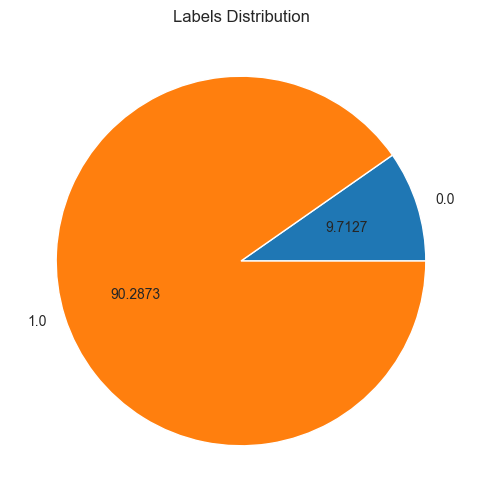

In [31]:
plt.title("Labels Distribution")
dataset.groupby('target').size().plot(kind='pie', autopct='%.4f', figsize=(6,6))

<Axes: xlabel='target'>

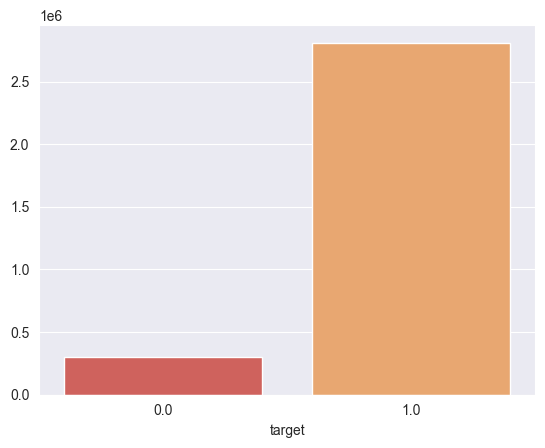

In [32]:
palette = sb.color_palette('Spectral')
sb.barplot(y=dataset['target'].value_counts().values, x=dataset['target'].value_counts().index, palette=palette)

In [39]:
# Export the dataset
dataset.to_csv("./merged_data.csv", index=False, header=True)